In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
rm = gpd.read_file('spatialdata/rm_nse_gp.shp')
cambridge = gpd.read_file('sample-spatialdata/CambridgeStreet_wgs84.shp')
rm_roads = gpd.read_file('spatialdata/lima_osm_roads_drive/lima_osm_roads_drive.shp')

In [55]:
rm.crs, rm_roads.crs

({u'ellps': u'intl',
  u'no_defs': True,
  u'proj': u'utm',
  u'south': True,
  u'units': u'm',
  u'zone': 18},
 {u'ellps': u'intl',
  u'no_defs': True,
  u'proj': u'utm',
  u'south': True,
  u'units': u'm',
  u'zone': 18})

In [54]:
rm_roads = rm_roads.to_crs(rm.crs)

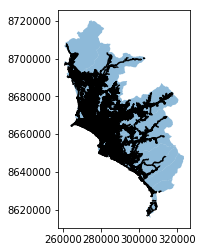

In [56]:
ax = rm.plot(alpha=0.5)
rm_roads.plot(ax=ax,color='k')

In [42]:
lapunta = rm[rm['distrito']=='LA PUNTA'].geometry.values[0]

In [57]:
lapunta_roads = []
for road in tqdm(rm_roads.itertuples(), total=len(rm_roads)):
    if lapunta.contains(road.geometry):
        lapunta_roads.append(road.Index)

100%|██████████| 193242/193242 [00:00<00:00, 223628.41it/s]


In [58]:
len(lapunta_roads)

49

In [59]:
lapunta_roads_df = rm_roads.loc[lapunta_roads,'geometry']

In [60]:
lapunta_roads_df = lapunta_roads_df.to_crs(cambridge.crs)

In [61]:
lapunta_roads_df.to_file('spatialdata/LapuntaStreet_wgs84.shp')